S. Ruzzin, A. Vega **"K-State Honor Code "On my honor, as a student, I have neither given nor received unauthorized aid on this academic work.**

Intro:
    We had originally intended to do a twitter comparison baseed on the Critical Role Kickstarter fund and possibly other related kickstarters like Gloomhaven. Unfortunately, we could not pull tweets from the past to cover the time frame we wished to. Instead, we are using a block of data I crawled from twitter on March 7th. I took nearly 8000 tweets that mentioned CriticalRole during a time preceeding and during their weekly episode. I did this crawl for fun to see if I could use it to analyze the episode itself and predict and determine what the episode was about, and who the most important characters were. 

# Outline\

## 1. Data Identification and Collection
        
## 2. Business and Data Understanding

## 3. Data Cleaning and Text Preprocessing

## 4. Descriptive Analytics

## 5. Content Analytics

## 6. Network Analytics

## 7. Final Analysis and Storytelling


## What is Critical Role? 

According to Critical Role's about section on their website "What began in 2012 as a bunch of friends playing in each other's living rooms has evolved into a multi-platform entertainment sensation, attracting over half million viewers every week. Now in its second campaign storyline, the show features seven popular voiceover actors diving into epic Dungeons & Dragons adventures, led by veteran gamemaster Matthew Mercer."

In simple terms, Critical Role is like a live action TV show, which rather than being scripted, follows a group of voice actors who play Dungeons and Dragons. Its viewership and popularity are unprecedented and as it says above, have more than 500,000 viewers per week.

Critical Role does merchandise, but it is an entertainment show and makes its revenue from advertisers and viewership on its portal sites. As such, it has very few direct customers.

# ----------------------- 1. Data Identification and Collection --------------------------

### Collection Method, Source, and Description

In our project we collected data from Twitter using a collection program from class via Spyder. We also used Spyder to crawl the twitter social network for every follower of CriticalRole. We collected nearly 8000 tweets from a time period 30minutes prior to an episode of CriticalRole to a period 30minutes after the episode finished.

We collected tweets that contained the keywords "CriticalRole" and "Critrole". And we pulled followers of "CriticalRole" to build our network visuals in Gephi.

To verify our results, my friends took a survey based on the episode for which our tweets were pulled during. They were unaware of how the information would be used. And I had them answer the following questions.
1. Which three characters played the biggest roles in tonight's episode?
2. Which three characters do you view most favorably?
3. Which characters will you remember most from this episode?

We used the answers to these questions (listed in the storytelling portion) to verify or defy the results that our twitter data suggests.

Its also worth noticing that CriticalRole during thiss time period had just created a kickstarter campaign for funding for an animated series. This is major news because they matched their funding goal of $750,000 within the first hour, and it was going for 3 days at time of the data collection. At that point they were over 6 million dollars (in total they raised just over 11 million when the fundraising campaign ended). therefor we may see a number of references to Kickstarter as well in the dataset.

#### Survey Responses: 
Administered to 4 viewers of the episode and responses were collected immediately after the episode ended.

1. Which three characters played the biggest roles in tonight's episode?
    - Jon:   Beau, Fjord, Caleb
    - Josh:  Beau, Fjord, Nott
    - Ashley:Beau, Fjord, Jester
    - Josh:  Beau, Fjord, Jester



2. Which three characters do you view most favorably?
    - Jon:   Fjord, Nott, Jester
    - Josh:  Fjord, Caleb, Jester
    - Ashley:Jester, Fjord, Caleb
    - Josh:  Fjord, Caleb, Nott



3. Which characters will you remember most from this episode?
    - Jon:   Beau, Fjord, Jester
    - Josh:  Beau, Fjord, Caleb
    - Ashley:Beau, Caleb, Fjord
    - Josh:  Beau, Fjord, Jester

# ----------------------- 2. Business and Data Understanding -----------------------

For our project we sought to consider what kind of twitter data would be most useful to a company like Critical Role. How would they handle their data? And where would useful insights come from? Based on this thought process we  identified a few questions to focus on.

Who are the most merchandisable characters in the story? And which characters do viewers like the most?
- To understand this, we will look at the data and see what kind of sentiment is most revealed from our tweets. It should let us know who is viewed most favorably. Additionally, we will look at who is most prominent in the episode.
- Rationale: Understanding which characters are most merchandisable would undoubtably help position ads and sales opportunities for the future.


Who are the most active twitter users, who effects the twitter network the most?
- To answer this, we will look at the accounts that tweet the most often or are mentioned most often and pair that data with our Gephi network analytics.
- Rationale: Knowing who is most active can help reward contributors, or identify those who might be risks.

Does twitter accurately respond to or portray the most active characters in an episode?
- This response willbe a pairing of data from the tweets compared to the small survey of viewers. 
- Rationale: Knowing how accurate the tweets can be will help verify the usefulness or accuracy of the other questions.

# ----------------------- 3. Data cleaning & Text Preprocessing -----------------------

In [1]:
# import packages
import csv
import pandas as pd
import re
import json

%matplotlib inline
import matplotlib.pyplot as plt

from textblob import TextBlob   

#NLTK imports
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from collections import Counter

#gensim imports
import gensim
from gensim.corpora import Dictionary
from gensim.models import ldamodel
from gensim import corpora, models, similarities
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.wrappers import LdaVowpalWabbit, LdaMallet

import numpy
import numpy as np

from PIL import Image
from os import path
import os
import random

import warnings
warnings.filterwarnings("ignore")  # To ignore all warnings that arise here to enhance clarity

### Import collected data

In [2]:
# creating an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('data/Updated_CritRole.json'):
    try:
        data.append(json.loads(line))
    except:
        pass
# lets see how many we got
print(len(data))

7771


In [3]:
#confirming data loaded properly
for i in data[:5]:
    print(i['text'])

RT @Saturnberries: Tiefling twins 💙😈
#criticalrole #criticalrolefanart https://t.co/QfX31X5Djp
RT @iorverth: Monk fight. #CriticalRole #criticalrolefanart #CriticalRoleArt https://t.co/gMN3GjSLyB
RT @cryades: Quick reminder that the creators of Critical Role have listed their favorite charities on the critrole website. If you’re miff…
RT @VoiceOfOBrien: I will see you in court, Kelly. https://t.co/hDoeCxAPA1
@BrianWFoster @CriticalRole Just happened to notice Brian's favorite number was on the critical role twitch. Just w… https://t.co/PUhiCB53HL


In [4]:
#seeing if any rows weren't tweets
texts1 = [ T['text'] for T in data if 'text' in T ]
len(texts1)

7771

In [5]:
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets) 

7771

In [6]:
# extracting information from tweets
ids = [T['id_str'] for T in tweets]
times = [T['created_at'] for T in tweets]
texts = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]

# open an output csv file to write to
out = open('CRUpdateddata.csv', 'w', encoding='UTF-8', newline='')
out.write('id,created at,text,screen name,\n')
rows = list(zip(ids, times, texts, screen_names))
csv = csv.writer(out)
for row in rows:
    values = [value for value in row]
    csv.writerow(values)
out.close()

In [7]:
# Cleaning the tweet text within the dataframe
df = pd.read_csv("CRUpdateddata.csv")
df['text'] = df.text.str.lower()
df['hashtags'] = df.text.str.findall(r"(?<=#)\w+")
df['mentions'] = df.text.str.findall("(?<=@)\w+")
df['hashtags'] = df['hashtags'].apply(', '.join)
df['mentions'] = df['mentions'].apply(', '.join)
df['cleaned'] = df['text']
df['cleaned'] = df.cleaned.str.replace('http\S+|www.\S+', '')
df['cleaned'] = df['cleaned'].str.replace("[^a-zA-Z]", " ")
df['cleaned'] = df.cleaned.str.findall('\w{3,}').str.join(' ')
df.head(2)

,id,created at,text,screen name,Unnamed: 4,hashtags,mentions,cleaned
0,1103845423255617537,Fri Mar 08 02:30:32 +0000 2019,rt @saturnberries: tiefling twins 💙😈\n#critica...,CaroChirps,NaN,"criticalrole, criticalrolefanart",saturnberries,saturnberries tiefling twins criticalrole crit...
1,1103845427135303681,Fri Mar 08 02:30:32 +0000 2019,rt @iorverth: monk fight. #criticalrole #criti...,opininginplay,NaN,"criticalrole, criticalrolefanart, criticalroleart",iorverth,iorverth monk fight criticalrole criticalrolef...


In [8]:
df_count_user = df.groupby('screen name').size().reset_index()
df_count_user.head()

,screen name,0
0,025_Ajax,1
1,0BubbleDragon0,1
2,0Deorain,1
3,1001cranes,3
4,1tudore,1


In [9]:
# Finding who tweeted the most during the time period
df_count_unique_user = df['screen name'].value_counts()
df_count_unique_user.head(10)

KatWaterflame      234
Wally_Wests        190
CritRoleStats      180
CritRoleFanart      81
KyleWithAnN         75
vonnie_bee          75
WagonAgeOregons     74
otdderamin          66
_Maihel             59
Drgnfly42           54
Name: screen name, dtype: int64

In [10]:
#creating and setting the stopword list.

stopwords = set(STOPWORDS)
stopwords.add("criticalrole")
stopwords.add("nobody")
stopwords.add("likes")
stopwords.add("watching")
stopwords.add("will")
stopwords.add("now")
stopwords.add("stretch")
stopwords.add("tfw")
stopwords.add("see")
stopwords.add("need")
stopwords.add("time")
stopwords.add("good")
stopwords.add("tho")
stopwords.add("know")
stopwords.add("tell")
stopwords.add("let")
stopwords.add("think")
stopwords.add("wearing")
stopwords.add("seemed")
stopwords.add("don")
stopwords.add("make")
stopwords.add("made")
stopwords.add("really")
stopwords.add("look")
stopwords.add("got")
stopwords.add("hey")
stopwords.add("show")
stopwords.add("said")
stopwords.add("using")
stopwords.add("saw")
stopwords.add("eeee")

df['cleaned'] = df['cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
df.head(2)

,id,created at,text,screen name,Unnamed: 4,hashtags,mentions,cleaned
0,1103845423255617537,Fri Mar 08 02:30:32 +0000 2019,rt @saturnberries: tiefling twins 💙😈\n#critica...,CaroChirps,NaN,"criticalrole, criticalrolefanart",saturnberries,saturnberries tiefling twins criticalrolefanart
1,1103845427135303681,Fri Mar 08 02:30:32 +0000 2019,rt @iorverth: monk fight. #criticalrole #criti...,opininginplay,NaN,"criticalrole, criticalrolefanart, criticalroleart",iorverth,iorverth monk fight criticalrolefanart critica...


In [11]:
#greathing gephi compatible chart for network analysis
dfGephi = df
dfGephi = dfGephi.drop(['id', 'created at', 'text', 'Unnamed: 4', 'hashtags', 'cleaned'], axis=1)

In [12]:
#writing mentions to csv for Gephi analysis
dfGephi.to_csv('CRgephi.csv')

# ----------------------- 4. Descriptive Analytics -----------------------

## Word Frequency Analysis

In [13]:
from collections import Counter
fdist = list(Counter(" ".join(df['cleaned']).split(" ")).items())

freq_word = []
for k,v in fdist:
    freq_word.append([k,v])

wordlist = pd.DataFrame(freq_word)
wordlist = wordlist.rename(columns={0: 'word', 1: 'freq'})
logotext = wordlist.sort_values('freq', ascending=False)
wordlist.sort_values('freq', ascending=False).head(10)

,word,freq
3,criticalrolefanart,887
357,beau,515
791,caleb,480
356,arsequeef,450
20,voiceofobrien,420
236,tonight,407
132,fjord,369
905,critrolestats,345
2859,accent,342
497,dairon,325


#### Tokenizing for FreqDist

In [14]:
# what if you have additional stopwords to be removed
tokens = str(texts)
#lowecases
tokens = tokens.lower()
# Remove useless numbers and alphanumerical words
tokens = re.sub("[^a-zA-Z0-9]", " ", tokens)
#tokenization or word split
tokens = word_tokenize(tokens)
#get stemming words or lemmas
wordnet_lemmatizer = WordNetLemmatizer()
tokens = (wordnet_lemmatizer.lemmatize(word) for word in tokens)
#additional stopwrods
tokens = (word for word in tokens if word not in stopwords)
# Filter non-alphanumeric characters from tokens
tokens = (word for word in tokens if word.isalpha())
#remove short words
tokens = (word for word in tokens if len(word) >= 3)

fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'criticalrolefanart': 887, 'arsequeef': 450, 'accent': 434, 'voiceofobrien': 420, 'tonight': 407, 'caleb': 392, 'beau': 383, 'critrolestats': 345, 'fjord': 324, 'criticalroleart': 308, ...})

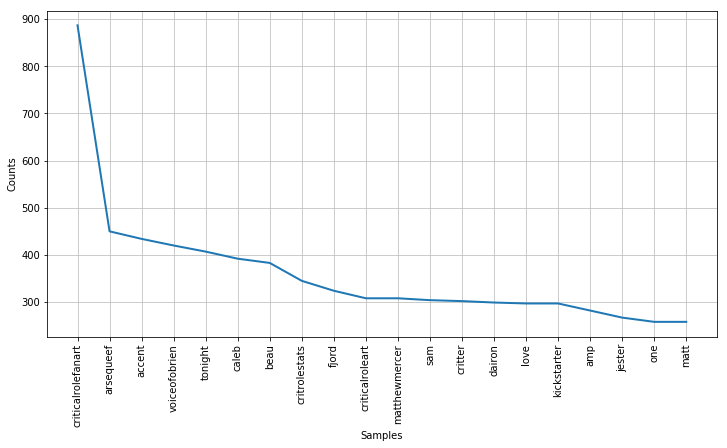

In [15]:
#plotting the most frequent words
plt.figure(figsize=(12,6))
fdist.plot(20)

## Wordcloud

In [16]:
#Cleaning for wordcloud
documents =[re.sub("[^a-zA-Z]+", " ", str(text)) for text in texts]
texts = [document.lower().split() for document in documents]
lmtzr = WordNetLemmatizer()
texts = [[lmtzr.lemmatize(word) for word in tokens] for tokens in texts]
texts = [ [ word for word in tokens if word not in stopwords ] for tokens in texts]
texts = [ [ word for word in tokens if len(word) >= 3 ] for tokens in texts ]
texts[:1]

[['saturnberries', 'tiefling', 'twin', 'criticalrolefanart', 'qfx', 'djp']]

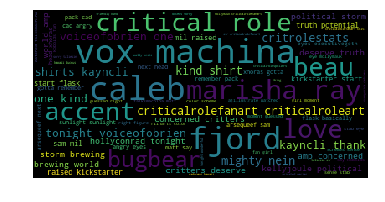

In [17]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5, stopwords=stopwords).generate(' '.join(df['cleaned']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Wordcloud image

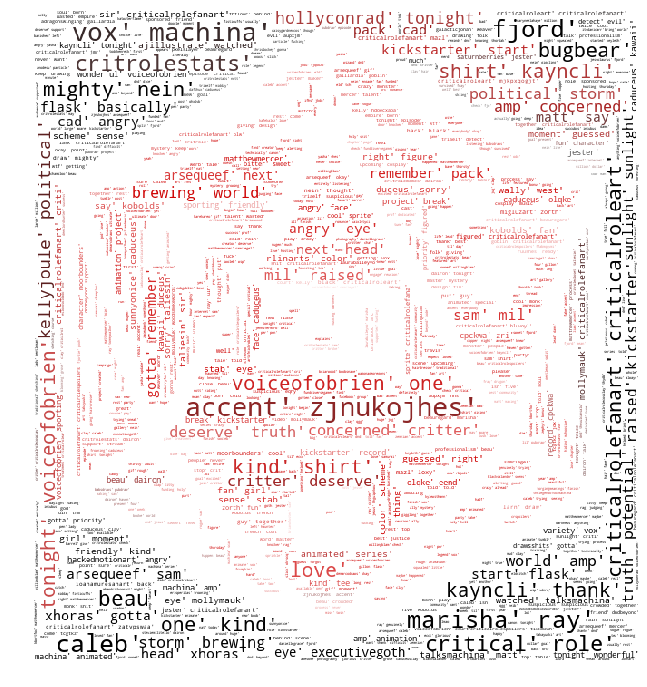

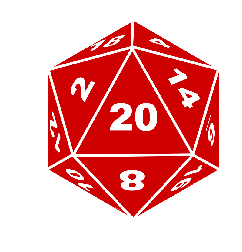

In [18]:
wctext = str(texts)
dnd_mask = np.array(Image.open("data/die.png"))
wc = WordCloud(background_color="white", max_words=3000, mask=dnd_mask, max_font_size=50, random_state=42)
image_colors = ImageColorGenerator(dnd_mask)
wc.generate(wctext)

# show
plt.figure(figsize=(12, 12))
plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")

plt.figure()
plt.imshow(dnd_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.savefig("data/CRlogoWC.png")
plt.savefig("data/CRlogo.pdf")

# ----------------------- 5. Content Analytics -----------------------

### Sentiment Analysis

Here we've searched each tweet to see if they've mentioned the characters within them, then counted for each character how many tweets they're in. After that we've printed that number, and ran a sentiment analysis on each group of tweets by character mentioned. Lastly, we took them and put them into a new dataframe to show off the results.

In [19]:
vs = SentimentIntensityAnalyzer()
df['score'] = df['text'].apply(lambda x: vs.polarity_scores(x)['compound'])
df.head(1)

,id,created at,text,screen name,Unnamed: 4,hashtags,mentions,cleaned,score
0,1103845423255617537,Fri Mar 08 02:30:32 +0000 2019,rt @saturnberries: tiefling twins 💙😈\n#critica...,CaroChirps,NaN,"criticalrole, criticalrolefanart",saturnberries,saturnberries tiefling twins criticalrolefanart,0.0


In [20]:
#Sentiment and frequency analyses
Mercer = df.text.str.contains("mercer|matt|dungeonmaster")
Merlen = len(df[Mercer])
MercerTotal = df[Mercer]['score'].sum()
Mercersenti = (MercerTotal/len(df[Mercer]))
jester = df.text.str.contains("jester")
jeslen = len(df[jester])
jesterTotal = df[jester]['score'].sum()
jestersenti = (jesterTotal/len(df[jester]))
caleb = df.text.str.contains("caleb")
callen = len(df[caleb])
calebTotal = df[caleb]['score'].sum()
calebsenti = (calebTotal/len(df[caleb]))
caduceus = df.text.str.contains("caduceus")
cadlen = len(df[caduceus])
caduceusTotal = df[caduceus]['score'].sum()
caduceussenti = (caduceusTotal/len(df[caduceus]))
nott = df.text.str.contains("nott")
notlen = len(df[nott])
nottTotal = df[nott]['score'].sum()
nottsenti = (nottTotal/len(df[nott]))
beauregard = df.text.str.contains("beau | beauregard")
bealen = len(df[beauregard])
beauregardTotal = df[beauregard]['score'].sum()
beauregardsenti = (beauregardTotal/len(df[beauregard]))
yasha = df.text.str.contains("yasha")
yaslen = len(df[yasha])
yashaTotal = df[yasha]['score'].sum()
yashasenti = (yashaTotal/len(df[yasha]))
fjord = df.text.str.contains("fjord")
fjolen = len(df[fjord])
fjordTotal = df[fjord]['score'].sum()
fjordsenti = (fjordTotal/len(df[fjord]))

In [21]:
df_count_user = df.groupby('screen name').size().reset_index()
df_count_unique_user = df['screen name'].value_counts()


In [22]:
mentions = []

for tweet in df['text']:
    a = re.findall(r"(?<=@)\w+", tweet)
    for i in a:
        mentions.append(['@'+i][0])
mentionCounter = Counter(mentions)

In [23]:
hashtags = []

for tweet in df['text']:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtags.append(['#'+i][0])
hashtagCounter = Counter(hashtags)

### Sentiment Summary

In [24]:
d = {'Character': ['Mercer','jester','caleb', 'caduceus', 'nott', 'beauregard', 'yasha', 'fjord'], 'mentioncount': [Merlen, jeslen, callen, cadlen, notlen, bealen, yaslen, fjolen],  'Sentiscore': [Mercersenti, jestersenti, calebsenti, caduceussenti, nottsenti, beauregardsenti, yashasenti, fjordsenti]}
dfSummary = pd.DataFrame(data=d)

In [25]:
dfSummary.sort_values(by='mentioncount', ascending=False)

,Character,mentioncount,Sentiscore
0,Mercer,644,0.221796
2,caleb,472,0.057830
5,beauregard,361,0.143843
7,fjord,323,0.095653
1,jester,317,0.061141
3,caduceus,258,0.019635
4,nott,235,0.114553
6,yasha,92,-0.087438


In [26]:
dfSummary.sort_values(by='Sentiscore', ascending=False)

,Character,mentioncount,Sentiscore
0,Mercer,644,0.221796
5,beauregard,361,0.143843
4,nott,235,0.114553
7,fjord,323,0.095653
1,jester,317,0.061141
2,caleb,472,0.057830
3,caduceus,258,0.019635
6,yasha,92,-0.087438


#  Topic Modeling

In [27]:
len(texts)

7771

In [28]:
dictionary = Dictionary(texts)
dictionary.save('data/tmcritrole.dict')  # store the dictionary, for future reference
len(dictionary)

7229

In [29]:
dictionary.filter_extremes(no_below=5) #https://radimrehurek.com/gensim/corpora/dictionary.html#gensim.corpora.dictionary.Dictionary.filter_extremes

In [30]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize('data/tmcritrole.mm', corpus)  # store to disk, for later use  # store to disk, for later use

In [31]:
print(('Number of unique tokens: %d' % len(dictionary)))
print(('Number of documents: %d' % len(corpus)))

Number of unique tokens: 1704
Number of documents: 7771


In [32]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=35, passes=20)

In [33]:
numpy.random.seed(1) # setting random seed to get the same results each time. 
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=35, passes=30)

In [34]:
model.save('data/lda.model')

In [35]:
model.show_topics(num_topics=2, num_words=10, log=False, formatted=True)

[(16,
  '0.064*"scene" + 0.056*"five" + 0.052*"behind" + 0.050*"video" + 0.047*"something" + 0.047*"music" + 0.043*"cosplay" + 0.038*"jester" + 0.037*"coat" + 0.037*"kobolds"'),
 (8,
  '0.273*"jester" + 0.098*"criticalrolefanart" + 0.065*"saturnberries" + 0.047*"give" + 0.046*"zatvpswaa" + 0.038*"lady" + 0.027*"criticalrolecosplay" + 0.021*"deep" + 0.021*"seems" + 0.019*"fanart"')]

In [36]:
# Prints the topics.
for top in model.show_topics(num_topics=2):
    print(top)

(26, '0.118*"sunlight" + 0.106*"told" + 0.072*"born" + 0.056*"cold" + 0.054*"soul" + 0.046*"fan" + 0.044*"rain" + 0.040*"tale" + 0.039*"werb" + 0.039*"criti"')
(7, '0.066*"people" + 0.062*"beau" + 0.057*"shit" + 0.043*"ready" + 0.039*"monk" + 0.037*"criticalrolefanart" + 0.037*"mercer" + 0.033*"animated" + 0.032*"dairon" + 0.031*"cool"')


In [37]:
# print words without probability
for i in range(0,15):
    topics = model.show_topic(i, 10)
    print(', '.join([str(word[0]) for word in topics]))

two, around, caleb, critrole, come, nott, hit, critrolestats, try, even
god, wait, happy, long, sneak, huge, thursday, watch, lol, many
fjord, night, never, arsequeef, point, doe, willingblam, crazy, okay, isn
crit, help, frumpkin, quick, cute, titmouseinc, action, want, arcane, special
matt, bugbear, right, say, moment, fan, figure, watched, girl, talksmachina
together, guy, nein, criticalrolefanart, mighty, draw, thought, put, larn, hluvoyl
beau, dairon, critrolestats, talk, party, rest, sure, door, criticalrolespoilers, done
people, beau, shit, ready, monk, criticalrolefanart, mercer, animated, dairon, cool
jester, criticalrolefanart, saturnberries, give, zatvpswaa, lady, criticalrolecosplay, deep, seems, fanart
eye, criticalrolefanart, mollymauk, color, beauregard, criti, rlinarts, sense, scheme, stab
criticalrolefanart, criticalrolespoilers, clay, new, sweet, caduceus, figured, cast, priority, mazl
take, fucking, table, anything, vax, yet, boob, coming, another, voiceofobrien
kick

In [38]:
lda_corpus = model[corpus]
results = []
for i in lda_corpus:
    results.append(i)

In [39]:
# finding highest value from each row
toptopic = [max(collection, key=lambda x: x[1])[0] for collection in results]
toptopic[:5]

[29, 31, 4, 20, 19]

In [40]:
toptopic = pd.DataFrame(toptopic)
documents = pd.DataFrame(documents)
documents = documents.rename(columns = {0: 'documents'})
summary = documents.join(toptopic)

In [41]:
summary.groupby(0).count()

,documents
0,
0,688
1,141
2,329
3,96
4,295
5,172
6,387
7,201
8,190


In [42]:
import pyLDAvis.gensim

In [43]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0      0.029420 -0.182667       1        1  2.723875
1     -0.062213 -0.076737       2        1  1.954670
2     -0.035863 -0.221501       3        1  3.547898
3     -0.062713  0.003003       4        1  1.697667
4     -0.068099  0.016719       5        1  4.035712
5      0.166479  0.091036       6        1  2.793916
6      0.005114 -0.173627       7        1  3.865032
7      0.029222  0.006265       8        1  3.127971
8      0.171507  0.065841       9        1  2.317733
9      0.222324  0.059488      10        1  2.893711
10     0.183789 -0.002619      11        1  3.090954
11    -0.077077 -0.004200      12        1  2.200974
12    -0.087944  0.078426      13        1  2.843938
13    -0.039021 -0.010676      14        1  2.253183
14    -0.005260  0.190350      15        1  2.296077
15     0.170263 -0.069050      16        1  2.363626
16     0.014124  0.013260      17        1  2.227943
17     0.006793  0.070553      18        1  2.601785
18     0.162994  0.030299      19        1  2.218106
19    -0.116915 -0.005198      20        1  2.691048
20    -0.011474  0.158993      21        1  2.807799
21    -0.045516 -0.132946      22        1  2.870261
22     0.011799  0.092208      23        1  2.483101
23     0.073550  0.069046      24        1  2.128976
24    -0.097456 -0.029363      25        1  4.947392
25    -0.057052 -0.058404      26        1  2.824703
26    -0.047506 -0.035074      27        1  2.567554
27    -0.091105 -0.010725      28        1  3.690357
28    -0.197837  0.137502      29        1  3.258463
29    -0.090428 -0.005451      30        1  2.456625
30    -0.081584  0.033130      31        1  1.763309
31     0.219834  0.080520      32        1  3.869402
32    -0.209646  0.169581      33        1  3.883301
33     0.014125 -0.241328      34        1  3.845450
34     0.003373 -0.106655      35        1  2.857489, topic_info=     Category        Freq                  Term       Total  loglift  logprob
term                                                                         
311   Default  578.000000                  beau  578.000000  30.0000  30.0000
620   Default  547.000000                 caleb  547.000000  29.0000  29.0000
80    Default  364.000000                jester  364.000000  28.0000  28.0000
0     Default  988.000000    criticalrolefanart  988.000000  27.0000  27.0000
310   Default  476.000000             arsequeef  476.000000  26.0000  26.0000
120   Default  434.000000                 fjord  434.000000  25.0000  25.0000
592   Default  294.000000                  nott  294.000000  24.0000  24.0000
413   Default  343.000000                dairon  343.000000  23.0000  23.0000
20    Default  422.000000         voiceofobrien  422.000000  22.0000  22.0000
6     Default  337.000000       criticalroleart  337.000000  21.0000  21.0000
29    Default  355.000000                  love  355.000000  20.0000  20.0000
214   Default  409.000000               tonight  409.000000  19.0000  19.0000
787   Default  305.000000                   sam  305.000000  18.0000  18.0000
75    Default  302.000000           kickstarter  302.000000  17.0000  17.0000
148   Default  272.000000                  matt  272.000000  16.0000  16.0000
50    Default  214.000000                   eye  214.000000  15.0000  15.0000
211   Default  344.000000         matthewmercer  344.000000  14.0000  14.0000
934   Default  210.000000               triaelf  210.000000  13.0000  13.0000
52    Default  311.000000               critter  311.000000  12.0000  12.0000
578   Default  209.000000                 angry  209.000000  11.0000  11.0000
237   Default  271.000000              caduceus  271.000000  10.0000  10.0000
15    Default  196.000000                  role  196.000000   9.0000   9.0000
115   Default  271.000000                   one  271.000000   8.0000   8.0000
695   Default  393.000000         critrolestat

In [44]:
model.get_term_topics('beau')

[(6, 0.24447872), (7, 0.06211033)]

In [45]:
model.get_term_topics('caleb')

[(0, 0.060783263), (2, 0.027160188), (33, 0.21181773)]

In [46]:
bow = ['beau|beauregard','caleb','caduceus','jester', 'fjord', 'nott', 'yasha', 'mercer|matt|dungeonmaster']

In [47]:
bow = model.id2word.doc2bow(bow)
print(bow)

[(80, 1), (120, 1), (237, 1), (385, 1), (592, 1), (620, 1)]


In [48]:
doc_topics, word_topics, phi_values = model.get_document_topics(bow, per_word_topics=True)
word_topics

[(80, [8]), (120, [33]), (237, [31]), (385, [28]), (592, [15]), (620, [33])]

In [49]:
phi_values

[(80, [(8, 0.9999952)]),
 (120, [(33, 0.9999941)]),
 (237, [(31, 0.9999871)]),
 (385, [(28, 0.999982)]),
 (592, [(15, 0.9999934)]),
 (620, [(33, 0.9999976)])]

In [50]:
for k, v in dictionary.token2id.items():
    if v == 699:
        print(k, v)

ring 699


In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [52]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [53]:
texts = [ str(i) for i in texts]
for i in texts[:1]:
    print(i)

['saturnberries', 'tiefling', 'twin', 'criticalrolefanart', 'qfx', 'djp']


In [54]:
tfidf = tfidf_vectorizer.fit_transform(texts)

In [55]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [56]:
nmf = NMF(n_components=20, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("\nTopics in NMF model (Frobenius norm):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
n_top_words = 8
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (Frobenius norm):
Topic #0: zjnukojhes accent bad real liam zemnian difficult okxp
Topic #1: kayncli kind voiceofobrien tonight hollyconrad shirt thank friendly
Topic #2: sam flask mil basically raised start kickstarter arsequeef
Topic #3: potential truth brewing kellyjoule political storm concerned deserve
Topic #4: cad xhoras pack executivegoth remember head gotta angry
Topic #5: say fan right guessed talksmachina ajillustrate girl watched
Topic #6: jester saturnberries zatvpswaa criticalrolefanart criticalrolespoilers tixkmzah jmr adragonswinging
Topic #7: criticalroleart sunnyonice sorry taliesin duceus kawaii sir caduceus
Topic #8: vox machina kickstarter animation project record cpckwa zri
Topic #9: beau dairon rest professionalism crowded talk table critrolememes
Topic #10: scheme stab sense rlinarts color mollymauk criti eye
Topic #11: olqke eend hackedmotionart face caduceus angry clay qgg
Topic #12: caleb okay isn point trench coat sure arsequeef
Topic #1

In [57]:
nmf = NMF(n_components=20, random_state=1,
          beta_loss='kullback-leibler', solver='mu', max_iter=1000, alpha=.1,
          l1_ratio=.5).fit(tfidf)

print("\nTopics in NMF model (generalized Kullback-Leibler divergence):")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
n_top_words = 5
print_top_words(nmf, tfidf_feature_names, n_top_words)


Topics in NMF model (generalized Kullback-Leibler divergence):
Topic #0: accent zjnukojhes liam real bad
Topic #1: tonight voiceofobrien shirt kind kayncli
Topic #2: sam arsequeef flask kickstarter samriegel
Topic #3: critter world amp truth political
Topic #4: eye head executivegoth criticalrolefanart remember
Topic #5: matt right fan say moment
Topic #6: criticalrolefanart sweet god little goblin
Topic #7: criticalroleart caduceus taliesin sorry ioanamuresanart
Topic #8: vox machina series animated kickstarter
Topic #9: shit west wally beau thing
Topic #10: beau dairon rest gonna critrolestats
Topic #11: jester face nott zatvpswaa caduceus
Topic #12: caleb fjord bugbear critrolestats point
Topic #13: love nein guy mighty thought
Topic #14: cool character fun zorth migluzart
Topic #15: matthewmercer want thank best process
Topic #16: people born werb gotta stop
Topic #17: ray voiceofobrien marisha kelly hdoecxapa
Topic #18: role episode critical support friend
Topic #19: triaelf susp

### Cleaning topics to be understandable if I can add context to them, and showing rationalization for the changes.
- Topics in NMF model (generalized Kullback-Leibler divergence):

- Topic #0: accent zjnukojhes liam real bad
    - In the episode Caleb (played by Liam) tries to be bad at an accent, but it is difficult because he's a voice actor and very good at accents.


- Topic #1: tonight voiceofobrien shirt kind kayncli
    - Likely refers to Liam's shirt during the episode.


- Topic #2: sam arsequeef flask kickstarter samriegel
    - Sam (who plays Nott in the episode) hasa giant flask that he appears with in every episode, it has become a running joke.


- Topic #3: critter world amp truth political

- Topic #4: eye head executivegoth criticalrolefanart remember

- Topic #5: matt right fan say moment

- Topic #6: criticalrolefanart sweet god little goblin
    - During the episode a goblin character is prevalent and notable for his lack of arms.


- Topic #7: criticalroleart caduceus taliesin sorry ioanamuresanart
    - Caduceus is the character played by Taliesin
    

- Topic #8: vox machina series animated kickstarter
    - Vox Machina is the name of CriticalRole's first campaign, and the fundraiser is to produce an animated series based on that story.


- Topic #9: shit west wally beau thing

- Topic #10: beau dairon rest gonna critrolestats
    - Dairon is Beau's mentor in the story. and a long rest is when characters 'level up' which coincides with when Dairon shows up to teach Beau something new.
    

- Topic #11: jester face nott zatvpswaa caduceus
    - Jester, Nott, and Caduceus are all characters.
    

- Topic #12: caleb fjord bugbear critrolestats point
    - Fjord talks with a bugbear character in the story


- Topic #13: love nein guy mighty thought
    - The Mighty Nein is the name of the adventure group (character group) in the campaign.

- Topic #14: cool character fun zorth migluzart

- Topic #15: matthewmercer want thank best process

- Topic #16: people born werb gotta stop

- Topic #17: ray voiceofobrien marisha kelly hdoecxapa
    - Marisha Ray is the actor who plays Yasha, VoiceofObrien is the twitter handle for Caleb (Liam), 


- Topic #18: role episode critical support friend
    - Support CriticalRole by friending them.


- Topic #19: triaelf suspicious evil detect today
    - Detect Evil is a spell that can be cast in Dungeons and Dragons.

# ----------------------- 6. Network Analytics -----------------------

## Network Visualization using Gephi

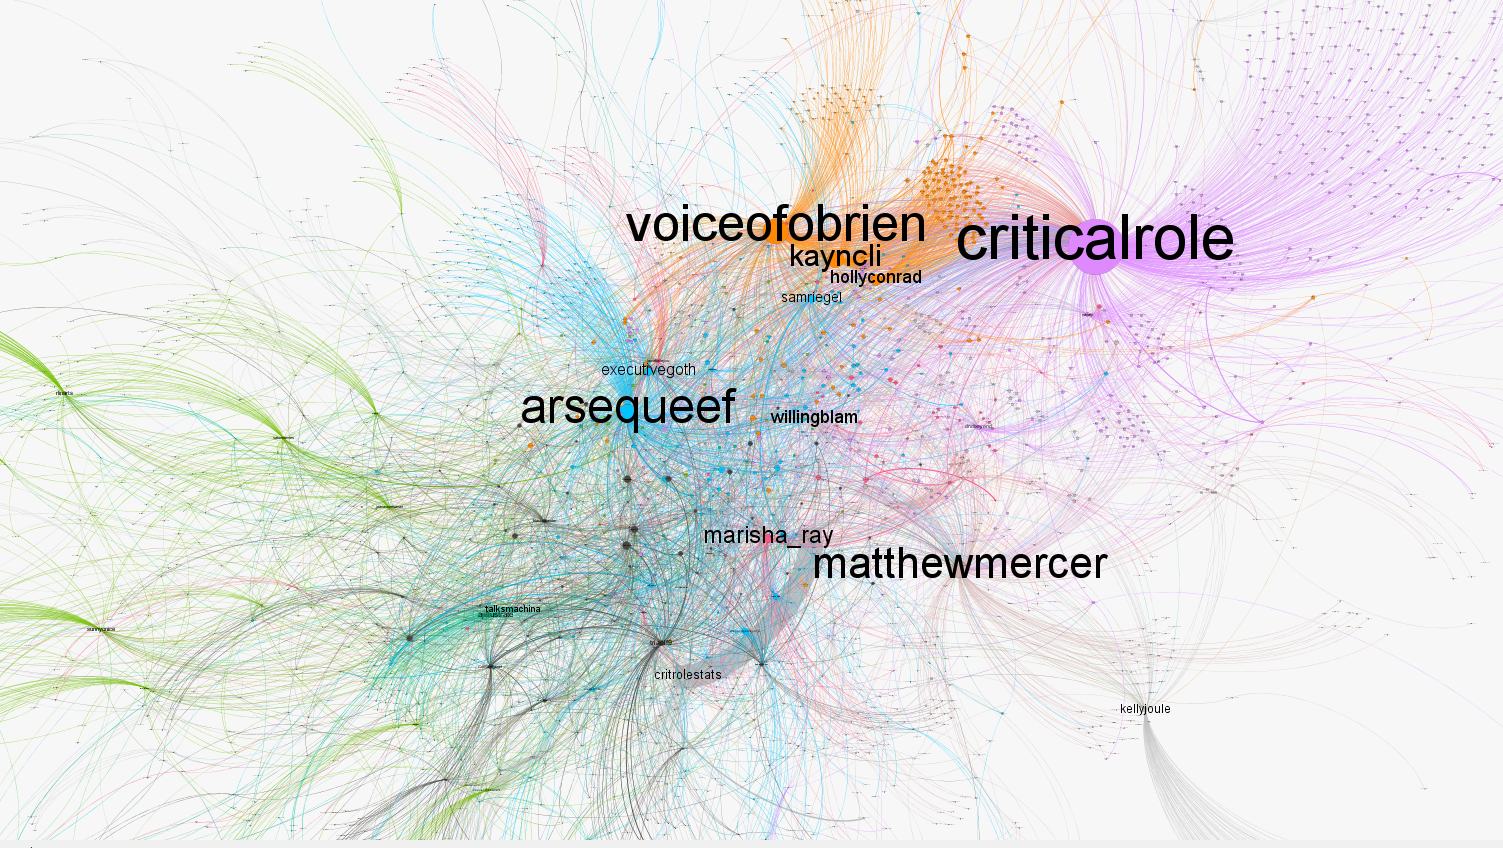

In [58]:
from IPython.display import Image
Image("data/CRnetAnalysis.png")

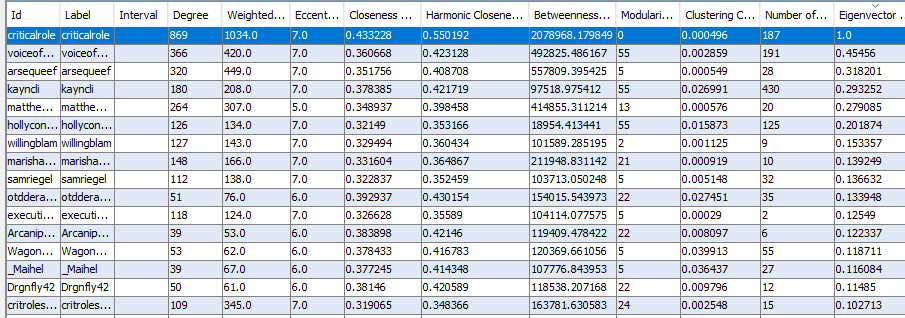

In [59]:
Image("data/CRnetAnalysisMetrics.png")

## Node & Network-level metrics using Gephi

If we take a look at the Network Analysis, we can come up with some interesting conclusions about the data and how it correlates. What we have done is taken over 7000 tweets and created a mention network. This allows to see the "chain" of communication between those that were tweeting about Critical Role. From the image, we can extract some visually important data pieces. These include but are not limited to:

 

- CriticalRole, this is what the data we pulled is about. So it makes sense that it is the most mentioned

- Voiceofobrien, this is Liam O'Brien who plays Caleb in Critical Role

- Arsequeef, graphic designer and artist that creates Critical Role fan material

- MatthewMercer, Matthew Mercer is the Dungeon Master for Critical Role

- Kayncli, Kayncli is a user who tweets A LOT about Critical Role and is active in the D&D community

- Hollyconrad, runs a popular youtube page and plays D&D every Tuesday

- Willingblam, Travis Willingham plays Fjord in Critical Role

- Marisha_ray, Marisha Ray plays Beauregard in Critical Role

- Executivegoth,  Taliesin Jaffe plays Caduceus Clay in Critical Role

- Samriegel, plays Nott in Critical Role

 

All of these people have some deep connections to the show or the D&D community. Whether this is the fact that they are mentioned quite frequently, or because they tweet at other about critical role, that is left for further analysis.  However, this gives us a good insight as to who is most prevalent in this dataset.

 

To further understand this image, we can take a brief look at the data table and compare some of the metrics. If we look specifically in terms of Eigenvector Centrality, we will notice that most of the same people have the highest Eigenvector centrality values. The highest of those being: Criticalrole, voiceofobrien, kayncli, and matthew mercer to name a few. If we look at these people and try to understand why they rank so high, CriticalRole is the obvious standout as it's the centerpiece of this analysis. It then goes down from there, however, each twitter handle in the top 10 is closely connected to other important people.

 

One interesting takeaway from Eigenvector Centrality specifically is that Kayncli, somebody who does not play in the show, ranks higher than Matthew Mercer, someone who does. What this could mean is that Kayncli tweets fervently about Critical Role, and mentions other primary characters in each tweet. Therefore, technically speaking, she is "connected" to more important people. This would raise her in terms of Eigenvector centrality, but maybe not other measures. We can prove that this is the case by looking at her Degree and Betweenness Centrality value. Kayncli has a degree of 180 and a Betweenness centrality of 97,000, whereas Matthew Mercer has a degree of 264 and a betweenness centrality of 415,000, showing that Mercer has many more mentions and connections than Kayncli does.

 

Another interesting piece of data is the user "kellyjoule". She resides fairly separated in the bottom right corner of the network analysis image. This raised some interest as she is not a character in Critical Role. She has a high Betweenness centrality, sitting at 5th place, however, she has a very low Eigenvector centrality value at .05. As to who she is, our research came back inconclusive, but we assume that she tweets and mentions a character, primarily matthewmercer quite frequently. 

# ----------------------- 7. Storytelling -----------------------

"(technical and managerial implications and suggestions). This should be considered the most important section in this project. Your client may be interested in this section only and use the previous sections as more like references. Insightful conclusions should be drawn and communicated with “business” people (e.g., senior managers). This should provide answers for the business or research questions posted earlier in the project "

### Sentiment and Frequency Results

We can see by number of tweets containing names of the characters that Mathew Mercer (the narrator/dungeon master/storyteller) is the most mentioned player. And the order and usage of each other character.

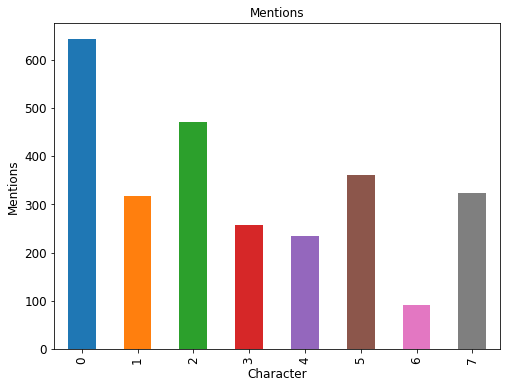

In [60]:
dfSummary.sort_values(by='mentioncount', ascending=False)
ax = dfSummary['mentioncount'].plot(kind='bar', title ="Mentions", figsize=(8, 6), fontsize=12)
ax.set_xlabel("Character", fontsize=12)
ax.set_ylabel("Mentions", fontsize=12)
plt.show()

Likewise, we performed a sentiment analysis on each tweet containing the characters, and divided by the total tweets to find the average sentiment score for each characterthis episode.

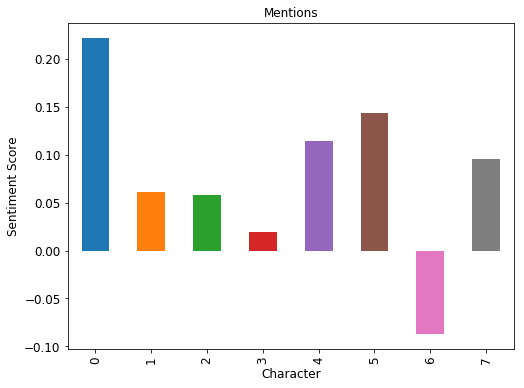

In [61]:
dfSummary.sort_values(by='Sentiscore', ascending=False)
ax2 = dfSummary['Sentiscore'].plot(kind='bar', title ="Mentions", figsize=(8, 6), fontsize=12)
ax2.set_xlabel("Character", fontsize=12)
ax2.set_ylabel("Sentiment Score", fontsize=12)
plt.show()

Between these two graphs we can discern that Mercer is the most mentioned, and most favored character in the episode. Beauregard was the most liked, and Caleb was the most mentioned.

Likewise, Caduceus was the least liked and least mentioned. 

Worth noting, Yasha the character was thematically present, but the actor who portrays Yasha was absent. Therefor we must treat the character with the preverbial asterisk until more data about her is analyzed.

#### tweet frequencies

In [62]:
df_count_unique_user.head(10)

KatWaterflame      234
Wally_Wests        190
CritRoleStats      180
CritRoleFanart      81
KyleWithAnN         75
vonnie_bee          75
WagonAgeOregons     74
otdderamin          66
_Maihel             59
Drgnfly42           54
Name: screen name, dtype: int64

In [63]:
mentionCounter.most_common(10)

[('@criticalrole', 1034),
 ('@arsequeef', 449),
 ('@voiceofobrien', 420),
 ('@critrolestats', 345),
 ('@matthewmercer', 307),
 ('@kayncli', 198),
 ('@marisha_ray', 166),
 ('@triaelf9', 150),
 ('@willingblam', 143),
 ('@samriegel', 138)]

In [64]:
hashtagCounter.most_common(10)

[('#criticalrole', 4586),
 ('#criticalrolefanart', 887),
 ('#criticalroleart', 308),
 ('#criticalrolespoilers', 172),
 ('#critters', 148),
 ('#criti', 133),
 ('#dnd', 89),
 ('#crit', 66),
 ('#pubdraw', 59),
 ('#criticalrolefana', 51)]

The mention counter shows who is mentioned most often in tweets that include 'criticalrole', obviously criticalrole is tagged most often, but following them is arsequeef, who holds criticalrole bingo games each thursday nightduringthe episode and is otherwise an active fan. voiceofobrien, matthewmercerm marisha_ray, willingblam, and samriegel are handles for Liam (Caleb), Matt (DM), Marisha (Beau), Travis (Fjord), and Sam (Nott).

The hashtag counter shows a listing of all the topics tweeters have chosen to highlight in their tweets. critters referes to fans of critical role, and twitter is a medium through which many fan-art creations are shared. 

### Topic Modeling Results

We have highlighted some of the above topics as recognizable plot points or notable actor moments in the storyline of the episode.
- Topic0: Caleb's pretending to be bad at accents
- Topic2: Sam's Giant Flask
- Topic6: The Armless Goblin
- Topic8: The Vox Machina Kickstarter
- Topic10: Beau's level-up with Dairon
- Topic12: Fjord talks with a bugbear
- Topic13: The name of the character group

As we can see, topic modeling allows us to use twitter data to pull relevant or often mentioned topics.

### Network Analytics Results

### Conclusions

Who are the most merchandisable characters in the story? And which characters do viewers like the most?
- According to our data, we found that Mercer is the most positively viewed character, Followed by Beau, Nott, and Fjord, within this episode. And Caleb, Beau, and Fjord were the most talked about. This analysis used over the course of a whole season will distinguish the best characters.

((To understand this, we will look at the data and see what kind of sentiment is most revealed from our tweets. It should let us know who is viewed most favorably. Additionally, we will look at who is most prominent in the episode.
Rationale: Understanding which characters are most merchandisable would undoubtably help position ads and sales opportunities for the future.))




Who are the most active twitter users, who effects the twitter network the most?
- KatWaterFlame, Wally_Wests, and CritRoleStats are the most frequent tweeters from that episode. But arsequeef, kayncli, and triaelf are the most mentioned non-participating users.


((To answer this, we will look at the accounts that tweet the most often or are mentioned most often and pair that data with our Gephi network analytics.
Rationale: Knowing who is most active can help reward contributors, or identify those who might be risks.))



Does twitter accurately respond to or portray the most active characters in an episode?
- Our data shows that the prediction we had from our tweets accuratly portrays two of the three most liked characters from the episode, and correctly predicts two of the three most used characters. This can lead us to surmize that we can in fact rely on tweets for some data, but also that it is not entirely reliable. Again, using this program over several weeks will help clarify its accuracy.



((This response willbe a pairing of data from the tweets compared to the small survey of viewers.
Rationale: Knowing how accurate the tweets can be will help verify the usefulness or accuracy of the other questions.))